## Introduction
This notebook aims to analyze the impact of video upload timing on viewer engagement and channel growth for multiple YouTube channels. The analysis involves data preprocessing, exploratory data analysis (EDA), feature engineering, and visualizations to uncover trends and insights.

In [2]:
# We import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data
We load the data from a CSV file into a Pandas DataFrame for further analysis.

In [7]:
# Load the dataset
df = pd.read_csv('all_channels_video_data1.csv')

# Display the shape and the first few rows of the DataFrame
print(df.shape)
df.head()

(5003, 9)


,channel_name,Title,Video_id,Published_date,Month,Views,Likes,Comments,Duration
0,John John Florence,POWER TIGER / Pyzel & John John Board Talk,QJlZlJ8RyCM,2024-07-26 19:41:43+00:00,Jul,34568,877,54,0 days 00:10:40
1,John John Florence,Raw Clips -- LATE SEASON BACKDOOR,ULTzb5MUvT0,2024-06-17 20:33:25+00:00,Jun,71110,1490,93,0 days 00:10:09
2,John John Florence,Is Winning the End Goal? Full video on my channel,y30Ujck0AXA,2024-06-13 21:38:56+00:00,Jun,7261,399,18,0 days 00:00:49
3,John John Florence,On the Process of Competing,4VO3JBohPug,2024-06-13 21:07:38+00:00,Jun,48366,1818,117,0 days 00:02:14
4,John John Florence,Today's Notes - raw clips John & Ivan,0YwEIm-N1Ac,2024-05-17 00:09:01+00:00,May,85742,1795,139,0 days 00:11:53


## Initial Data Inspection
Before making any changes to the data, we need to understand its structure. This involves checking for missing values, duplicates, and the data types of each column.

In [20]:
# Check for missing values and duplicates
print(df.isna().any())

print('----------------')
print(df.duplicated().sum())

print('----------------')
# Display data types of each column
df.dtypes


channel_name      False
Title             False
Video_id          False
Published_date    False
Month             False
Views             False
Likes             False
Comments          False
Duration          False
dtype: bool
----------------
0
----------------


channel_name      object
Title             object
Video_id          object
Published_date    object
Month             object
Views              int64
Likes              int64
Comments           int64
Duration          object
dtype: object

## Data Preprocessing

**Renaming Columns**

To standardize column names, we rename channel_name to Channel_name.

In [56]:
df.rename(columns={'channel_name': 'Channel_name'}, inplace=True)

**Handling Missing Values and Duplicates**

In [58]:
df.drop_duplicates(inplace=True)

**Converting Data Types**

We convert relevant columns to their appropriate data types for further analysis.

In [64]:
# Convert Published_date to datetime
df['Published_date'] = pd.to_datetime(df['Published_date'])

# Verify the conversion
df.dtypes

Channel_name                     object
Title                            object
Video_id                         object
Published_date      datetime64[ns, UTC]
Month                            object
Views                             int64
Likes                             int64
Comments                          int64
Duration                         object
Day_of_week                      object
Duration_seconds                float64
dtype: object

## Feature Engineering
**Creating New Features**


We create new features such as Day_of_week and Duration_seconds to facilitate analysis.

In [68]:
# Extract the day of the week from Published_date
df['Day_of_week'] = df['Published_date'].dt.day_name()

# Convert Duration to seconds
df['Duration_seconds'] = pd.to_timedelta(df['Duration']).dt.total_seconds()

# Display the updated DataFrame
df.head()


,Channel_name,Title,Video_id,Published_date,Month,Views,Likes,Comments,Duration,Day_of_week,Duration_seconds
0,John John Florence,POWER TIGER / Pyzel & John John Board Talk,QJlZlJ8RyCM,2024-07-26 19:41:43+00:00,Jul,34568,877,54,0 days 00:10:40,Friday,640.0
1,John John Florence,Raw Clips -- LATE SEASON BACKDOOR,ULTzb5MUvT0,2024-06-17 20:33:25+00:00,Jun,71110,1490,93,0 days 00:10:09,Monday,609.0
2,John John Florence,Is Winning the End Goal? Full video on my channel,y30Ujck0AXA,2024-06-13 21:38:56+00:00,Jun,7261,399,18,0 days 00:00:49,Thursday,49.0
3,John John Florence,On the Process of Competing,4VO3JBohPug,2024-06-13 21:07:38+00:00,Jun,48366,1818,117,0 days 00:02:14,Thursday,134.0
4,John John Florence,Today's Notes - raw clips John & Ivan,0YwEIm-N1Ac,2024-05-17 00:09:01+00:00,May,85742,1795,139,0 days 00:11:53,Friday,713.0


## Exploratory Data Analysis (EDA)
**Distribution of Upload Times and Engagement Metrics**

We analyze the distribution of video upload times and key engagement metrics to understand general trends in the data.

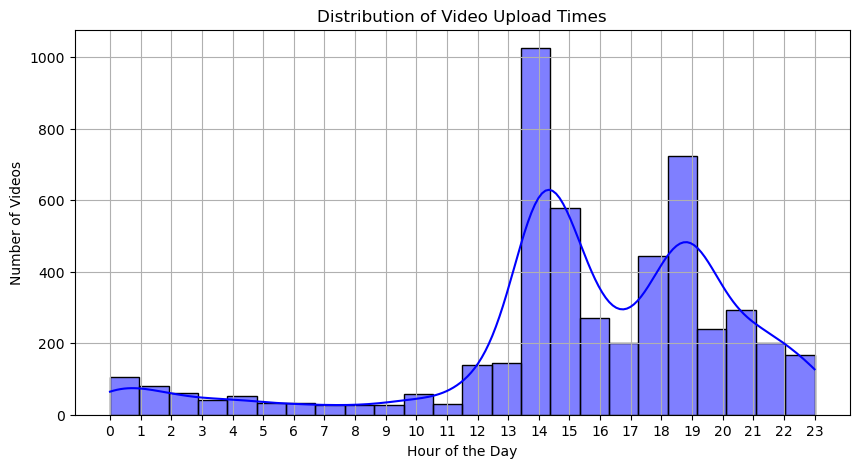

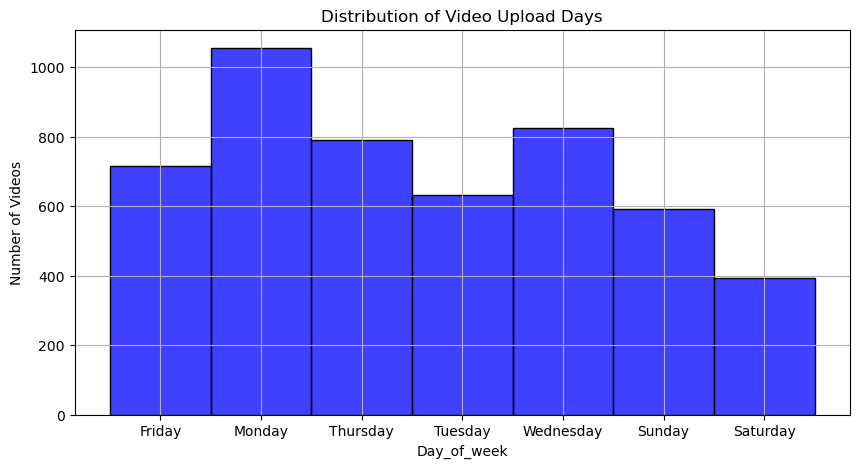

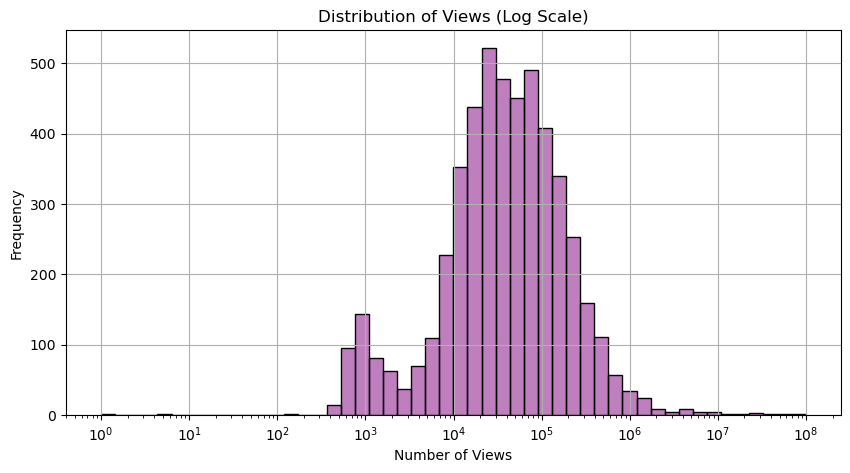

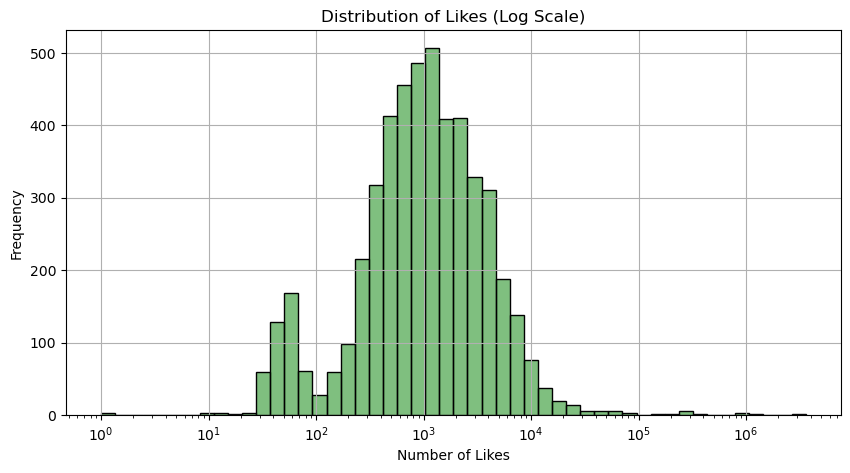

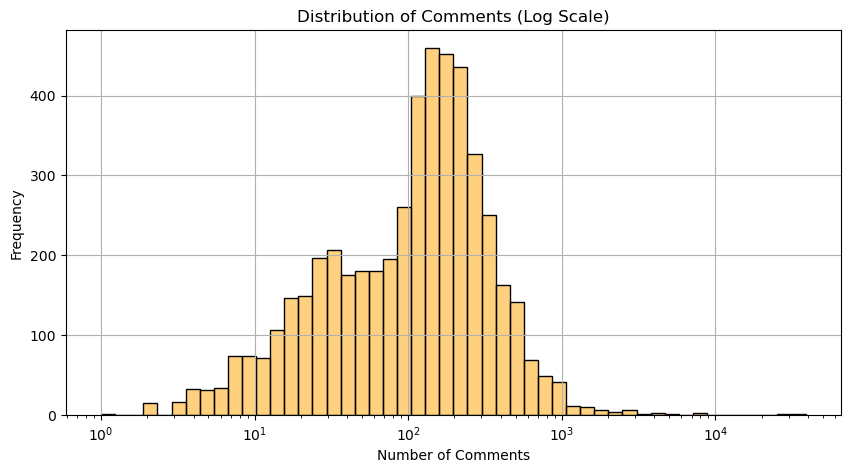

In [72]:
# Distribution of Video Upload Times
plt.figure(figsize=(10, 5))
sns.histplot(df['Published_date'].dt.hour, bins=24, kde=True, color='blue')
plt.title('Distribution of Video Upload Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Videos')
plt.xticks(range(24))
plt.grid(True)
plt.show()

# Distribution of Video Upload Days
plt.figure(figsize=(10, 5))
sns.histplot(df['Day_of_week'], color='blue')
plt.title('Distribution of Video Upload Days')
plt.ylabel('Number of Videos')
plt.xticks(range(7))
plt.grid(True)
plt.show()

# Distribution of Views (Log Scale)
plt.figure(figsize=(10, 5))
sns.histplot(df['Views'], bins=50, kde=True, color='purple', log_scale=True)
plt.title('Distribution of Views (Log Scale)')
plt.xlabel('Number of Views')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Distribution of Likes (Log Scale)
plt.figure(figsize=(10, 5))
sns.histplot(df['Likes'], bins=50, kde=True, color='green', log_scale=True)
plt.title('Distribution of Likes (Log Scale)')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Distribution of Comments (Log Scale)
plt.figure(figsize=(10, 5))
sns.histplot(df['Comments'], bins=50, kde=True, color='orange', log_scale=True)
plt.title('Distribution of Comments (Log Scale)')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**Correlation Analysis: Duration vs. Views**

We explore the relationship between video duration and views to identify any patterns.

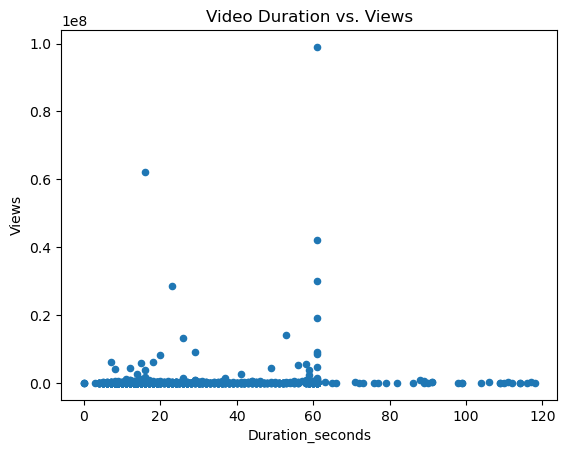

In [78]:
# Scatter plot for Duration vs. Views
df.query('Duration_seconds < 120').plot(kind='scatter',
        x='Duration_seconds',
        y='Views',
        title='Video Duration vs. Views')
plt.show()


## Advanced Feature Engineering

 **Creating a Channel_contribution Metric**

To better understand the overall impact of a video, we create a composite metric Channel_contribution that combines views, likes, and comments.

In [89]:
df['Channel_contribution'] = df['Views'] + df['Likes']*10 + df['Comments']*15

**Categorizing Upload Times by Part of the Day**

We categorize upload times into morning, afternoon, and evening to analyze the impact of upload timing.

In [93]:
def set_time_of_day(row):
    if (row['Published_date'].hour < 12) and (row['Published_date'].hour >= 0):
        return 'morning'
    elif (row['Published_date'].hour >= 12) and (row['Published_date'].hour < 18):
        return 'evening'
    return 'afternoon'

# Apply the function to create a new feature
df['Part_of_the_day'] = df.apply(set_time_of_day, axis=1)

**Visualizing Channel Contribution by Part of the Day**

We visualize the impact of upload timing on the Channel_contribution metric.

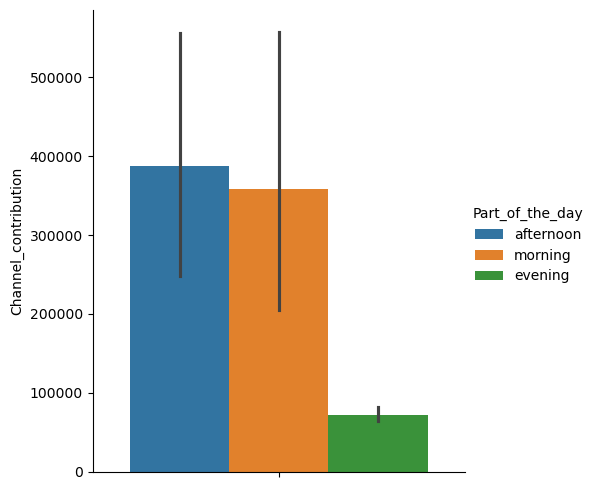

In [97]:
# Bar plot for Channel Contribution by Part of the Day
sns.catplot(y='Channel_contribution', hue='Part_of_the_day', data=df, kind='bar')
plt.show()


## Comparative Analysis

**Channel Contribution by Day of the Week**

We use a box plot to compare the distribution of Channel_contribution across different days of the week.

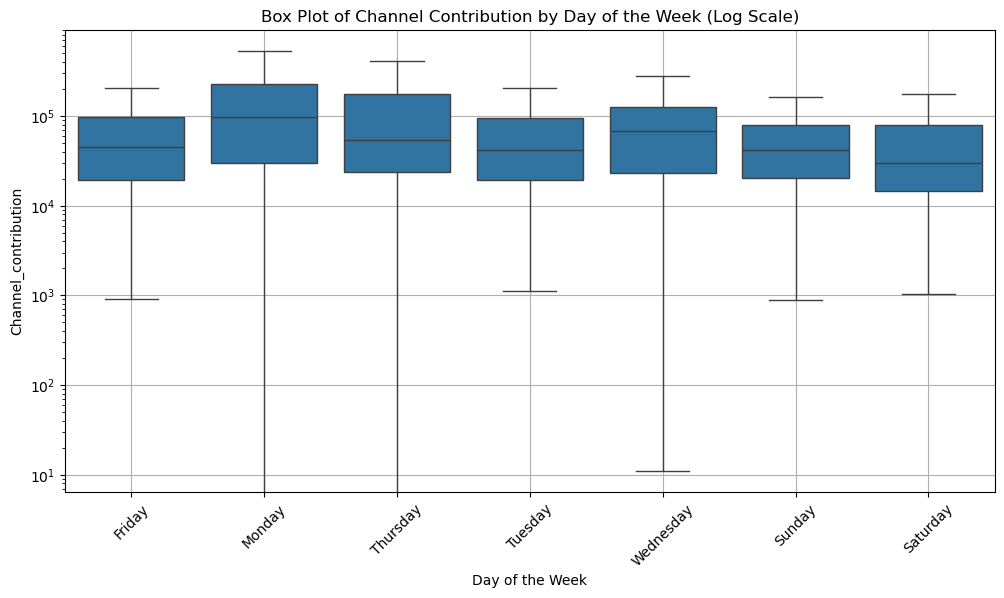

In [102]:
# Box Plot of Channel Contribution by Day of the Week
plt.figure(figsize=(12, 6))
sns.boxplot(x='Day_of_week', y='Channel_contribution', data=df, showfliers=False)
plt.yscale('log')
plt.title('Box Plot of Channel Contribution by Day of the Week (Log Scale)')
plt.xlabel('Day of the Week')
plt.ylabel('Channel_contribution')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Analyzing Average Views, Likes, and Comments**

We calculate and visualize the average views, likes, and comments for videos.

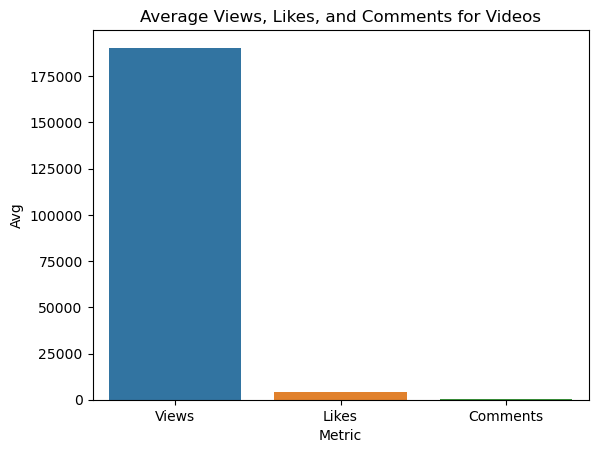

In [114]:
# Calculate the average views, likes, and comments
avg_s = df[['Views', 'Likes', 'Comments']].mean()

# Create a DataFrame for the averages
avg_df = pd.DataFrame({
    'Metric': avg_s.index,
    'Avg': avg_s.values
})

# Bar plot for average views, likes, and comments
sns.barplot(data=avg_df, x='Metric', y='Avg', hue='Metric')
plt.title('Average Views, Likes, and Comments for Videos')
plt.show()


## Trend Analysis


**Views Over Time by Channel**


We analyze the trend in views over time to identify patterns in channel growth.

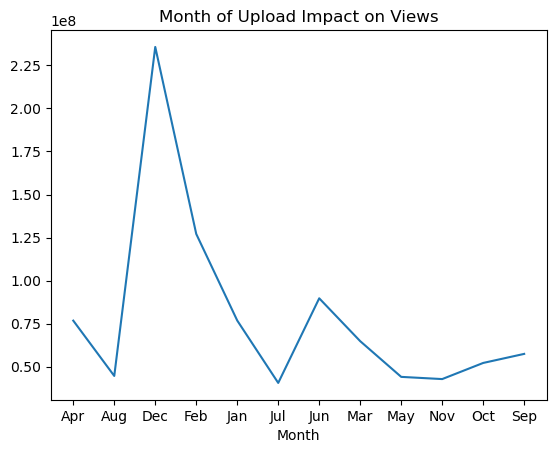

In [119]:
# Group views by the month of upload
monthly_upload_views = df.groupby('Month')['Views'].sum()

# Line plot for views over time by channel
sns.lineplot(x=monthly_upload_views.index, y=monthly_upload_views.values, sort=False)
plt.title("Month of Upload Impact on Views")
plt.show()


## Upload Gaps and Their Impact

**Calculating Upload Gaps**

We calculate the gaps between video uploads and analyze their impact on channel performance.



In [262]:
# Calculate upload gaps
df['Duration_minutes'] = df['Duration_seconds'] / 60
df_without_anomalies = df[(df['Duration_minutes'] < 80) & (df['Channel_contribution'] < 1.5 * 10000000)]

def get_upload_gaps(row1, row2):
    return row1['Published_date'] - row2['Published_date']

df_shifted = df.shift(-1)
df['Upload_gaps'] = df.apply(lambda row: get_upload_gaps(row, df_shifted.loc[row.name]), axis=1)

# Handle last video gap time
channels_last_video = df.groupby('Channel_name')['Published_date'].min()
channels_gap_median = df.groupby('Channel_name')['Upload_gaps'].median()
channels_last_vid_and_gap = pd.concat([channels_last_video, channels_gap_median], axis=1)

for index, row in channels_last_vid_and_gap.iterrows():
    mask = (df['Channel_name'] == index) & (df['Published_date'] == row['Published_date'])
    df.loc[mask, 'Upload_gaps'] = row['Upload_gaps']

# Check for negative gaps (anomalies)
(df['Upload_gaps'].dt.total_seconds() < 0).sum()


0

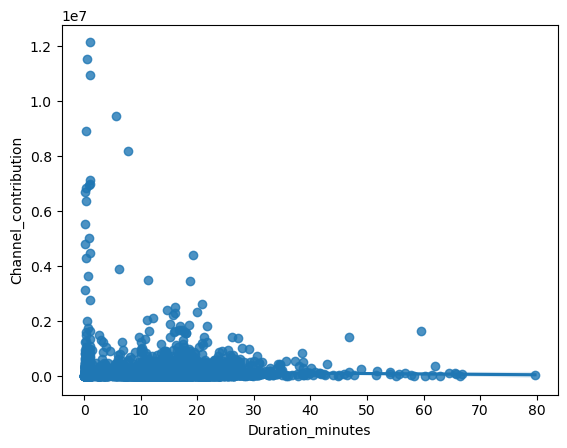

In [264]:
ax = sns.regplot(x="Duration_minutes", y="Channel_contribution", data=df_without_anomalies)

We can see in the visualization above that, As 'Duration_minutes' increases, 'Channel_contribution' tends to decrease or remain low. This could suggest that longer videos generally contribute less to the channel compared to shorter videos, or that viewer engagement decreases for longer content.


We will look at Channel Growth:
How does the 'View' count change over time?

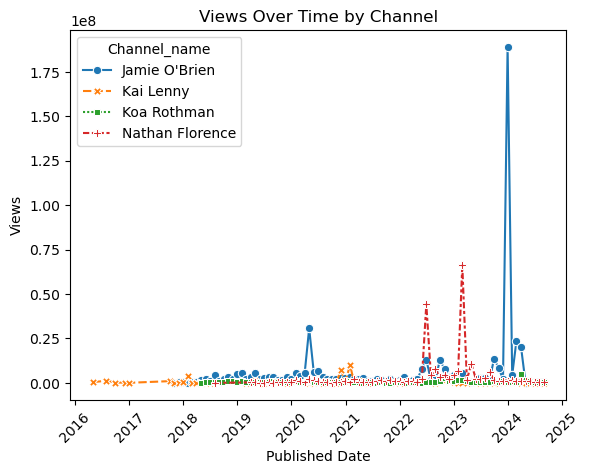

In [320]:
# Group by channel name and month, summing the views
groupedby_channels = df.groupby(['Channel_name', pd.Grouper(key='Published_date', freq='ME')])['Views'].sum().reset_index()

# Drop channels by filtering out unwanted ones
filtered_channels = groupedby_channels[~groupedby_channels['Channel_name'].isin
(['Italo Ferreira', 'Ho & Pringle Productions', 'Ben Gravy', 'John John Florence'])]
# Create the line plot
sns.lineplot(data=filtered_channels, x='Published_date', y='Views', hue='Channel_name', style='Channel_name', markers=True)

# Add labels and title
plt.xlabel('Published Date')
plt.ylabel('Views')
plt.title('Views Over Time by Channel')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)  
plt.show()


We can see that the "Jamie O'Brien" channel has a spike in the year 2024. 
Nathan Florence has spiked in the years 2023, 2024
let's see if it correlates with the timing of uploaded videos.

In [271]:
df['Duration_minutes'] = df['Duration_seconds']/60

In [273]:
df_without_anomalies = df[(df['Duration_minutes'] < 80) & (df['Channel_contribution'] < 1.5 * 10000000)]

In [275]:
def get_upload_gaps(row1, row2):
    return row1['Published_date'] - row2['Published_date']

In [277]:
df_shifted = df.shift(-1)
df_shifted.dtypes

Channel_name                         object
Title                                object
Video_id                             object
Published_date          datetime64[ns, UTC]
Month                                object
Views                               float64
Likes                               float64
Comments                            float64
Duration                             object
Day_of_week                          object
Duration_seconds                    float64
Channel_contribution                float64
Part_of_the_day                      object
Duration_minutes                    float64
Upload_gaps                 timedelta64[ns]
dtype: object

In [279]:
df['Upload_gaps'] = df.apply(lambda row: get_upload_gaps(row, df_shifted.loc[row.name]), axis=1)

# We check a channel's last video to understand what happens to the "upload gap"
df.iloc[158:165]

,Channel_name,Title,Video_id,Published_date,Month,Views,Likes,Comments,Duration,Day_of_week,Duration_seconds,Channel_contribution,Part_of_the_day,Duration_minutes,Upload_gaps
158,John John Florence,Departure Delayed,9K0hPcepA7s,2019-01-24 01:04:39+00:00,Jan,35655,523,17,0 days 00:04:12,Thursday,252.0,41140,morning,4.200000,0 days 01:30:00
159,John John Florence,"""View From A Blue Moon"" Teaser",yBul9VJTaQw,2019-01-23 23:34:39+00:00,Jan,12223,267,9,0 days 00:01:39,Wednesday,99.0,15028,afternoon,1.650000,-2036 days +08:34:12
160,Ben Gravy,Solid Surf Arrives in New Jersey from Hurrican...,jAPjU_MXNp4,2024-08-20 15:00:27+00:00,Aug,19365,624,79,0 days 00:15:20,Tuesday,920.0,26790,evening,15.333333,2 days 00:00:21
161,Ben Gravy,Hurricane Ernesto Front Runners Went Crazy,W0akSgro10s,2024-08-18 15:00:06+00:00,Aug,17355,502,65,0 days 00:24:42,Sunday,1482.0,23350,evening,24.700000,3 days 01:00:00
162,Ben Gravy,This is a HUGE DEAL For Me!,l_ai3-2eszo,2024-08-15 14:00:06+00:00,Aug,25723,1001,164,0 days 00:22:07,Thursday,1327.0,38193,evening,22.116667,4 days 00:59:19
163,Ben Gravy,Hurricane Debby HITS New Jersey,o9YjZKoddWw,2024-08-11 13:00:47+00:00,Aug,24176,785,104,0 days 00:12:17,Sunday,737.0,33586,evening,12.283333,2 days 22:59:58
164,Ben Gravy,What's the Best Surfboard to Ride Hurricane Se...,xLjAHUcfJk4,2024-08-08 14:00:49+00:00,Aug,16796,479,41,0 days 00:26:28,Thursday,1588.0,22201,evening,26.466667,2 days 00:00:26


We change each channel's last video to the median of the specific channel's upload_gaps inorder to deal with the channels overllap


In [282]:
channels_last_video = df.groupby('Channel_name')['Published_date'].min()
channels_last_video

Channel_name
Ben Gravy                  2007-11-12 13:23:36+00:00
Ho & Pringle Productions   2011-12-30 00:38:31+00:00
Italo Ferreira             2015-02-13 18:02:24+00:00
Jamie O'Brien              2017-10-02 01:17:38+00:00
John John Florence         2019-01-23 23:34:39+00:00
Kai Lenny                  2016-04-30 20:09:03+00:00
Koa Rothman                2018-04-25 09:30:01+00:00
Nathan Florence            2018-07-15 22:08:58+00:00
Name: Published_date, dtype: datetime64[ns, UTC]

In [284]:
channels_gap_median = df.groupby('Channel_name')['Upload_gaps'].median()
channels_gap_median

Channel_name
Ben Gravy                         1 days 00:22:54
Ho & Pringle Productions          6 days 23:22:58
Italo Ferreira                    5 days 23:52:31
Jamie O'Brien                     2 days 09:50:14
John John Florence         4 days 20:31:54.500000
Kai Lenny                  6 days 21:12:12.500000
Koa Rothman                       5 days 00:49:52
Nathan Florence            3 days 00:43:58.500000
Name: Upload_gaps, dtype: timedelta64[ns]

In [286]:
channels_last_vid_and_gap = pd.concat([channels_last_video, channels_gap_median], axis=1)
channels_last_vid_and_gap

,Published_date,Upload_gaps
Channel_name,,
Ben Gravy,2007-11-12 13:23:36+00:00,1 days 00:22:54
Ho & Pringle Productions,2011-12-30 00:38:31+00:00,6 days 23:22:58
Italo Ferreira,2015-02-13 18:02:24+00:00,5 days 23:52:31
Jamie O'Brien,2017-10-02 01:17:38+00:00,2 days 09:50:14
John John Florence,2019-01-23 23:34:39+00:00,4 days 20:31:54.500000
Kai Lenny,2016-04-30 20:09:03+00:00,6 days 21:12:12.500000
Koa Rothman,2018-04-25 09:30:01+00:00,5 days 00:49:52
Nathan Florence,2018-07-15 22:08:58+00:00,3 days 00:43:58.500000


In [288]:
for index, row in channels_last_vid_and_gap.iterrows():
    mask = (df['Channel_name']==index) &(df['Published_date']==row['Published_date'])
    df.loc[mask, 'Upload_gaps'] = row['Upload_gaps']

In [290]:
# We ensure there are no negative gap times
(df['Upload_gaps'].dt.total_seconds() < 0).sum()

0

In [316]:
Jamie_df24 = df[(df['Channel_name']=="Jamie O'Brien") & (df['Published_date'].dt.year.isin([2020,2024]))].copy()
Jamie_df = df[df['Channel_name']=="Jamie O'Brien"].copy()
Nathan_df22_23 = df[(df['Channel_name']=="Nathan Florence") & (df['Published_date'].dt.year.isin([2022,2023]))].copy()
Nathan_df = df[df['Channel_name']=="Nathan Florence"].copy()
Kai_df21 = df[(df['Channel_name']=="Kai Lenny") & (df['Published_date'].dt.year.isin([2020,2021]))].copy()
Kai_df = df[df['Channel_name']=="Kai Lenny"].copy()

spike_df = pd.DataFrame({'Channel_name':["Jamie O'Brien", "Nathan Florence", "Kai Lenny"],
                         'Average_upload_gaps':[Jamie_df['Upload_gaps'].mean(),
                                                Nathan_df['Upload_gaps'].mean(),
                                                Kai_df['Upload_gaps'].mean()],
                         'Average_upload_gaps_high_view_years': [Jamie_df24['Upload_gaps'].mean(),
                                                Nathan_df22_23['Upload_gaps'].mean(),
                                                Kai_df21['Upload_gaps'].mean()]})
spike_df

,Channel_name,Average_upload_gaps,Average_upload_gaps_high_view_years
0,Jamie O'Brien,2 days 15:13:58.942408376,4 days 07:22:48.254545454
1,Nathan Florence,4 days 04:41:20.822368421,2 days 16:56:39.483271375
2,Kai Lenny,15 days 08:07:06.962121212,13 days 08:44:20.894736842


it is clear that in 2024 the average time gap was twice the size of the average time gap for this channel, there was a video published every 4 days on average while the channel has a 2-day channel gap on average.
and it had a skyrocketing effect on the views.

We show how viewer engagement is impacted by the waiting period.

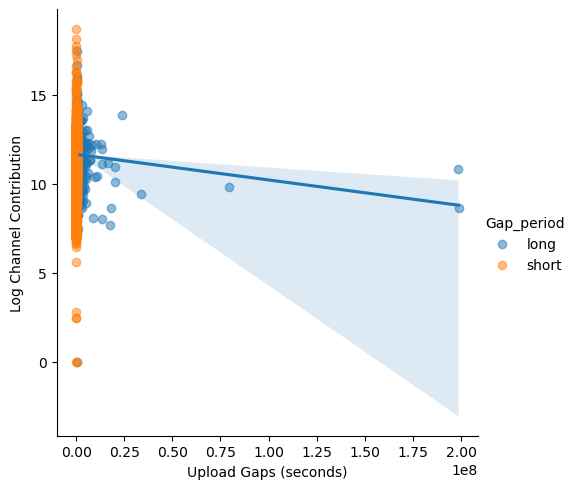

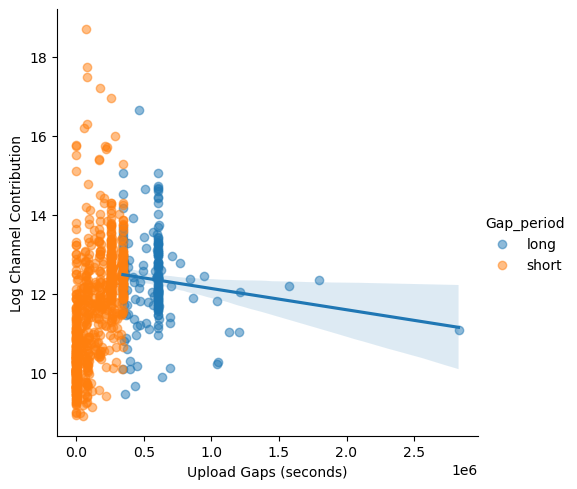

In [255]:
# Create a copy of the relevant columns
flt_df = df[['Channel_name', 'Channel_contribution', 'Upload_gaps']].copy()

# Classify upload gaps as 'short' or 'long'
flt_df['Gap_period'] = flt_df.apply(lambda x: 'short' if x['Upload_gaps'] <= pd.Timedelta(days=4) else 'long', axis=1)

# Convert 'Upload_gaps' to seconds
flt_df['Upload_gaps'] = flt_df['Upload_gaps'].dt.total_seconds()

# Apply logarithmic scale to 'Channel_contribution'
flt_df['Log_channel_contribution'] = np.log1p(flt_df['Channel_contribution'])

# Filter for Jamie O'Brien's data
Jamie_flt = flt_df[flt_df['Channel_name'] == "Jamie O'Brien"].copy()

# Plot for all data
all_data_plot = sns.lmplot(x='Upload_gaps', y='Log_channel_contribution', hue='Gap_period', data=flt_df, scatter_kws={'alpha': 0.5})
all_data_plot.set_titles("All Channels: Log Channel Contribution vs. Upload Gaps")
all_data_plot.set_axis_labels("Upload Gaps (seconds)", "Log Channel Contribution")

# Plot for Jamie O'Brien's data
jamie_plot = sns.lmplot(x='Upload_gaps', y='Log_channel_contribution', hue='Gap_period', data=Jamie_flt, scatter_kws={'alpha': 0.5})
jamie_plot.set_titles("Jamie O'Brien: Log Channel Contribution vs. Upload Gaps")
jamie_plot.set_axis_labels("Upload Gaps (seconds)", "Log Channel Contribution")

# Show the plots
plt.show()

## Key Findings
**Video Upload Timing:**

The timing of video uploads has a noticeable impact on viewer engagement. Videos uploaded during specific times of the day (morning, afternoon, evening) show different levels of engagement. For example, certain channels like "Jamie O'Brien" observed significant spikes in views when upload gaps were longer than usual, especially in 2024.

**Impact of Video Duration:**

There is a tendency for longer videos to contribute less to channel engagement metrics (Channel_contribution), which combines views, likes, and comments. This suggests that shorter videos may be more engaging or easier for viewers to consume.
Channel Contribution by Day of the Week:

The analysis reveals that certain days of the week may be more favorable for uploading videos, leading to higher Channel contribution. This indicates that strategic timing aligned with audience behavior can enhance engagement.

**Growth Trends:**

Channels like "Jamie O'Brien" and "Nathan Florence" showed significant growth in views over time, with clear spikes during specific periods, suggesting a correlation between upload consistency and channel growth.

**Upload Gaps and Engagement:**

Larger upload gaps, particularly for "Jamie O'Brien" in 2024, were associated with an increase in views, indicating that a longer waiting period between uploads can generate higher anticipation and engagement from viewers.

**Comparative Analysis Across Channels:**

When comparing multiple channels, differences in upload timing, frequency, and video length all contributed to varying levels of success in terms of views and overall channel contribution.

**Viewer Engagement:**

A significant finding is that the upload gap period (short vs. long) influences the logarithmic scale of Channel contribution, with longer gaps generally associated with higher engagement metrics for certain channels.